Welkom to the notebook of **bnlearn**!



**bnlearn** is Python package for *learning the graphical structure of Bayesian networks*, *parameter learning*, *inference* and *sampling methods*. Although there are very good Python packages for probabilistic graphical models, it still remains difficult (and somethimes unnecessarily) to (re)build certain pipelines. **bnlearn** for python (this package) is build on the [pgmpy](https://github.com/pgmpy/pgmpy/) package* and contains the most-wanted pipelines.


**Learning a Bayesian network can be split into:**
  * Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.
  * Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.
  * Inferences: Compute probabilities given the CPD and DAG.

**More information:**
* [API documentations](https://erdogant.github.io/bnlearn/)
* [Github](https://github.com/erdogant/bnlearn)

**Installation of libraries**

In [5]:
!pip install -U pgmpy==0.1.11
!pip install -U bnlearn
import pandas as pd
import numpy as np

Requirement already up-to-date: pgmpy==0.1.11 in /usr/local/lib/python3.6/dist-packages (0.1.11)
Requirement already up-to-date: bnlearn in /usr/local/lib/python3.6/dist-packages (0.3.11)


In [6]:

# Version pgmpy should be 0.1.11
import pgmpy
pgmpy.__version__

'0.1.11'

In [9]:
import bnlearn as bn
print(bn.__version__)

0.3.11


**Structure learning example**

[bnlearn] >Downloading example dataset..
[bnlearn] >Import dataset..
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


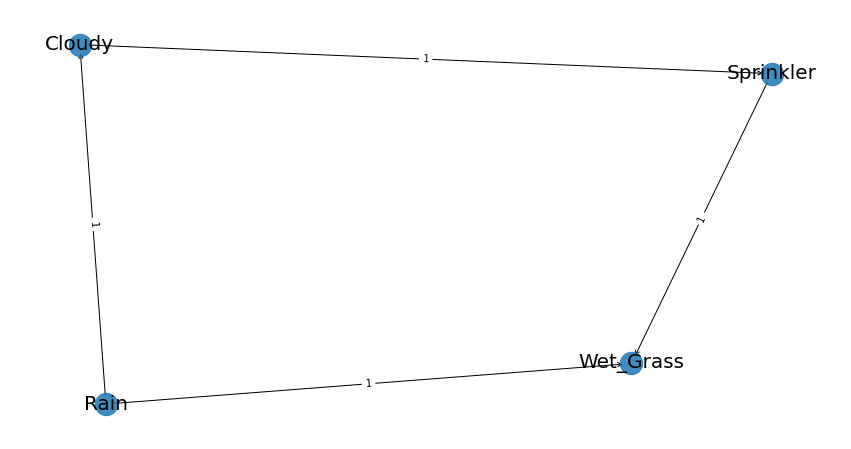

In [10]:
# Example dataframe sprinkler_data.csv can be loaded with: 
df = bn.import_example()
# df = pd.read_csv('sprinkler_data.csv')
model = bn.structure_learning.fit(df)
G = bn.plot(model)


**Various methodtypes and scoringtypes**

In [11]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]


Parameter Learning

[bnlearn] >Import dataset..
[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518219 | 0.6630434782608695  |
+-------

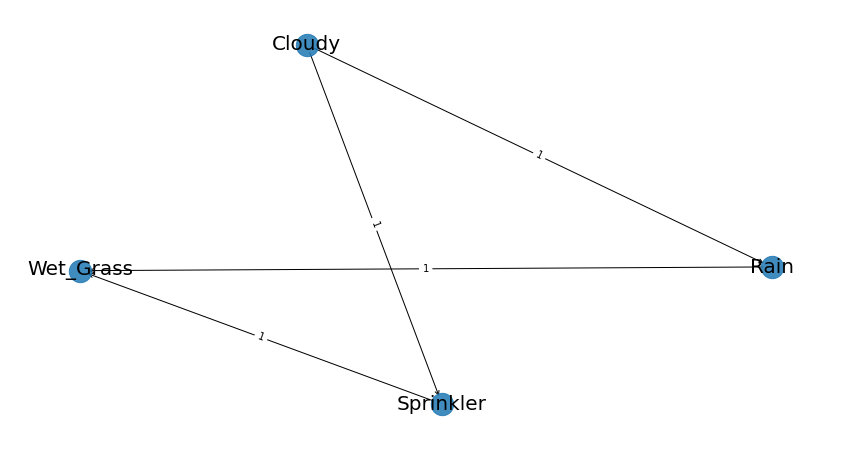

In [12]:
# Import dataframe
df = bn.import_example()
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('sprinkler', CPD=False)
# Now we learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df)
# Make plot
G = bn.plot(model_update)

**Inferences**

In [13]:
model = bn.import_DAG('sprinkler')
q_1 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1,'Sprinkler':0, 'Wet_Grass':1})
q_2 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Eliminating: Wet_Grass: 100%|██████████| 2/2 [00:00<00:00, 210.11it/s]

[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Variable Elimination..
+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.0000 |
+---------+-------------+
| Rain(1) |      1.0000 |
+---------+-------------+
[bnlearn] >Variable Elimination..
+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.2000 |
+---------+-------------+
| Rain(1) |      0.8000 |
+---------+-------------+


Inference

**Sampling**

In [14]:
model = bn.import_DAG('sprinkler')
df = bn.sampling(model, n=1000)

Generating for node: Wet_Grass: 100%|██████████| 4/4 [00:00<00:00, 31.34it/s]

[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Forward sampling for 1000 samples..


**Comparing networks**

[bnlearn] >Loading bif file </usr/local/lib/python3.6/dist-packages/bnlearn/data/ASIA/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Plot based on BayesianModel


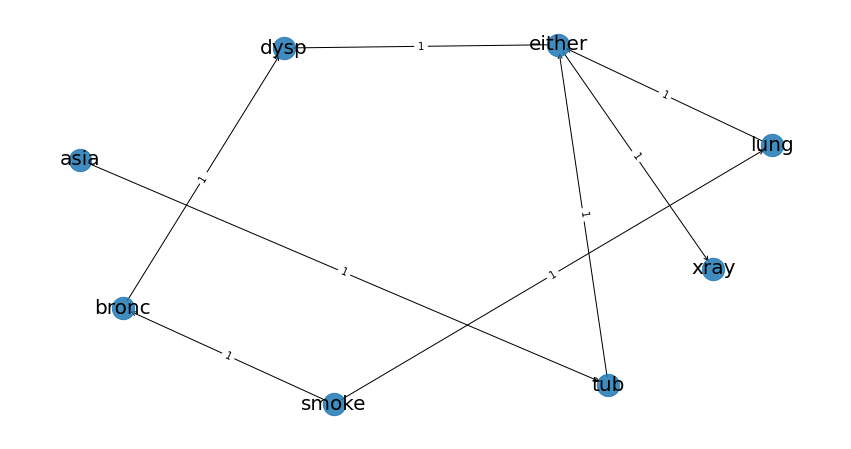

Generating for node: bronc:   0%|          | 0/8 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 10000 samples..


Generating for node: xray: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel
[bnlearn] >Existing coordinates from <pos> are used.


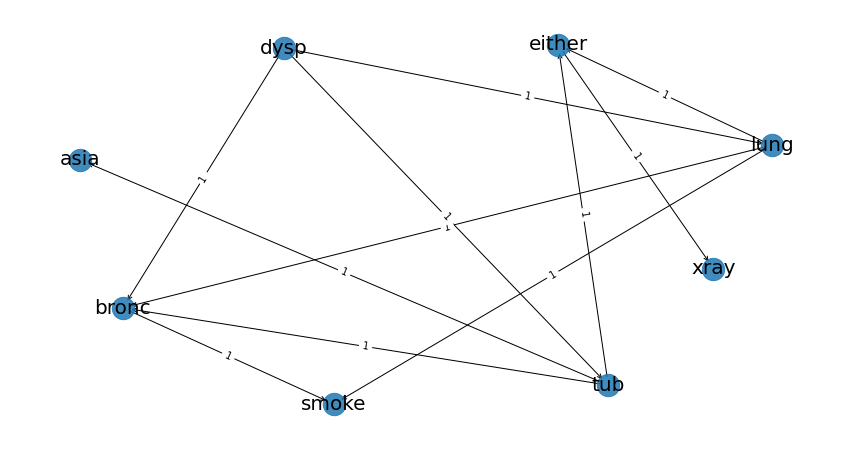

[bnlearn] >Existing coordinates from <pos> are used.


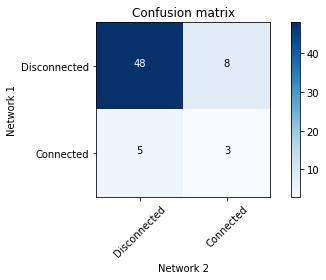

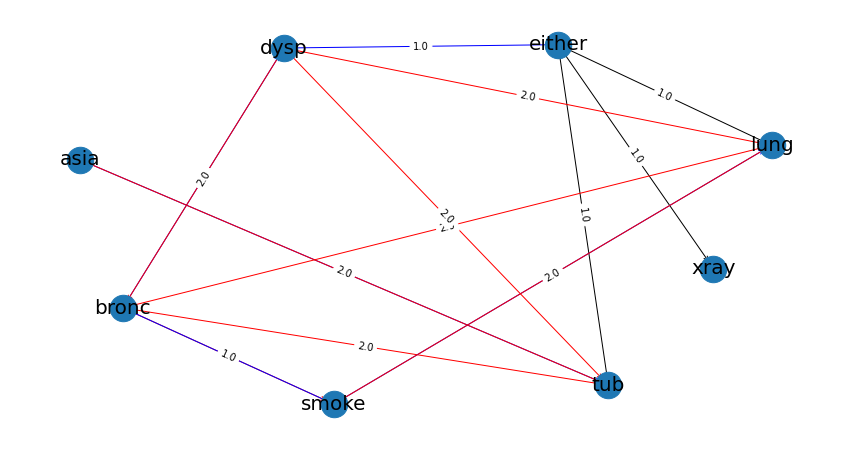

(array([[48,  8],
        [ 5,  3]]), target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        2    0      0     0      2       1     0     0
 smoke      0    0      0    -1     -1       0     0     0
 lung       0    0      2     0      2       1     0     0
 bronc      0    0      2     0      0       0     0    -1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    2      0     2      2       0     0     0)

In [24]:
# Load asia DAG
model = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model)
# Sampling
df = bn.sampling(model, n=10000)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])
# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

**Loading example DAG files**

Note that some of the CPDs do not add up to exactly 1. This will raise an error that needs to be fixed in the input file. As an example, the **asia** works correctly but when you try **pathfinder** throws the error: "*>Warning: CPD [Fault] does not add up to 1 but is: 1.00000003*". You need to make sure that it exactly sums up to 1.

In [23]:
bif_file= 'sprinkler'
bif_file= 'alarm'
bif_file= 'andes'
bif_file= 'asia'
#bif_file= 'pathfinder'
#bif_file= 'sachs'
#bif_file= 'miserables'
#bif_file= 'filepath/to/model.bif'

# Loading example dataset
model = bn.import_DAG(bif_file, verbose=1)

**Fin notebook**